In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load cleaned combined data
train = pd.read_csv(r"C:\Users\on3_a\Documents\Data Analytics, Big Data & Predictive Analytics/Data/bikeshare_weather.csv")
train.drop(['Unnamed: 0'], axis=1, inplace=True)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8722 entries, 0 to 8721
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 8722 non-null   object 
 1   trips                8722 non-null   int64  
 2   Temp (°C)            8722 non-null   float64
 3   Dew Point Temp (°C)  8722 non-null   float64
 4   Rel Hum (%)          8722 non-null   float64
 5   Visibility (km)      8722 non-null   float64
 6   Stn Press (kPa)      8722 non-null   float64
 7   Hmdx                 8722 non-null   float64
 8   Wind Chill           8722 non-null   float64
 9   Strong Wind          8722 non-null   int64  
 10  Fog                  8722 non-null   int64  
 11  Freezing Rain        8722 non-null   int64  
 12  Haze                 8722 non-null   int64  
 13  Heavy Rain           8722 non-null   int64  
 14  Moderate Rain        8722 non-null   int64  
 15  Moderate Snow        8722 non-null   i

In [4]:
train.head()

,date,trips,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill,Strong Wind,...,Freezing Rain,Haze,Heavy Rain,Moderate Rain,Moderate Snow,Rain,Snow,Thunderstorms,Weekend,Holiday
0,2018-01-01 00:00:00,4,-16.2,-20.5,70.0,16.1,102.13,0.0,-22.0,0,...,0,0,0,0,0,0,0,0,0,1
1,2018-01-01 01:00:00,10,-16.8,-21.1,70.0,16.1,102.10,0.0,-20.0,0,...,0,0,0,0,0,0,0,0,0,1
2,2018-01-01 02:00:00,6,-17.3,-20.8,75.0,16.1,102.15,0.0,-26.0,0,...,0,0,0,0,0,0,0,0,0,1
3,2018-01-01 03:00:00,14,-17.9,-21.6,73.0,16.1,102.13,0.0,-24.0,0,...,0,0,0,0,0,0,0,0,0,1
4,2018-01-01 04:00:00,6,-17.2,-21.1,72.0,16.1,102.09,0.0,-21.0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
# Scale numeric features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [6]:
train.columns

Index(['date', 'trips', 'Temp (°C)', 'Dew Point Temp (°C)', 'Rel Hum (%)',
       'Visibility (km)', 'Stn Press (kPa)', 'Hmdx', 'Wind Chill',
       'Strong Wind', 'Fog', 'Freezing Rain', 'Haze', 'Heavy Rain',
       'Moderate Rain', 'Moderate Snow', 'Rain', 'Snow', 'Thunderstorms',
       'Weekend', 'Holiday'],
      dtype='object')

In [7]:
num_vars = ['Temp (°C)', 'Dew Point Temp (°C)', 'Rel Hum (%)', 
            'Visibility (km)', 'Stn Press (kPa)', 'Hmdx', 'Wind Chill']

train[num_vars] = scaler.fit_transform(train[num_vars])

In [8]:
train.head()

,date,trips,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill,Strong Wind,...,Freezing Rain,Haze,Heavy Rain,Moderate Rain,Moderate Snow,Rain,Snow,Thunderstorms,Weekend,Holiday
0,2018-01-01 00:00:00,4,0.107750,0.139847,0.638554,1.0,0.748614,0.0,0.31250,0,...,0,0,0,0,0,0,0,0,0,1
1,2018-01-01 01:00:00,10,0.096408,0.128352,0.638554,1.0,0.743068,0.0,0.37500,0,...,0,0,0,0,0,0,0,0,0,1
2,2018-01-01 02:00:00,6,0.086957,0.134100,0.698795,1.0,0.752311,0.0,0.18750,0,...,0,0,0,0,0,0,0,0,0,1
3,2018-01-01 03:00:00,14,0.075614,0.118774,0.674699,1.0,0.748614,0.0,0.25000,0,...,0,0,0,0,0,0,0,0,0,1
4,2018-01-01 04:00:00,6,0.088847,0.128352,0.662651,1.0,0.741220,0.0,0.34375,0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
X,y =train[['Temp (°C)', 'Dew Point Temp (°C)', 'Rel Hum (%)',
       'Visibility (km)', 'Stn Press (kPa)', 'Hmdx', 'Wind Chill',
       'Strong Wind', 'Fog', 'Freezing Rain', 'Haze', 'Heavy Rain',
       'Moderate Rain', 'Moderate Snow', 'Rain', 'Snow', 'Thunderstorms',
       'Weekend', 'Holiday']].values,train['trips'].values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 6105 rows
Test Set: 2617 rows


## Linear Regression Model (Trial 1)

In [12]:
from sklearn.linear_model import LinearRegression 

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import time

In [16]:
regressor = LinearRegression()

In [25]:
start = time.time()
predicted = cross_val_predict(regressor, X_train, y_train, cv=15)
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 0.0520319938659668


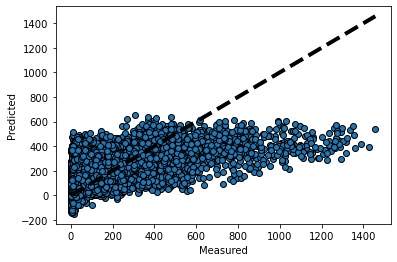

In [18]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.scatter(y_train, predicted, edgecolors = (0,0,0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [20]:
import math

In [27]:
scoring = ['r2','neg_mean_squared_error','neg_mean_absolute_error']
for i in scoring:
    scores = cross_val_score(regressor, X_train, y_train, cv=15, scoring = i)
#    print(scores)
    if i == 'r2':
        print(i, ': ', scores.mean())
    elif i == 'neg_mean_squared_error':    
        x = -1*scores.mean()
        y = math.sqrt(x) 
        print('RMSE: ', "%0.3f" % y)
    elif i == 'neg_mean_absolute_error':
        x = -1*scores.mean()
        print(i, ": %0.2f (+/- %0.2f)" % (x, scores.std() * 2))   

r2 :  0.34476860531144393
RMSE:  201.572
neg_mean_absolute_error : 140.18 (+/- 14.38)


## Random Forest Regression Model (Trial 1)

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
rfr1 = RandomForestRegressor(n_estimators=60, criterion='mse', random_state=2)

In [30]:
start = time.time()
predicted = cross_val_predict(rfr1, X_train, y_train, cv=15)
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 10.654997825622559


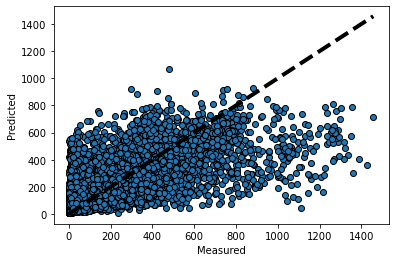

In [31]:
fig,ax = plt.subplots()
ax.scatter(y_train, predicted, edgecolors = (0,0,0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [32]:
scoring = ['r2','neg_mean_squared_error','neg_mean_absolute_error']
for i in scoring:
    scores = cross_val_score(rfr1, X_train, y_train, cv=15, scoring = i)
#    print(scores)
    if i == 'r2':
        print(i, ': ', scores.mean())
    elif i == 'neg_mean_squared_error':    
        x = -1*scores.mean()
        y = math.sqrt(x) 
        print('RMSE: ', "%0.3f" % y)
    elif i == 'neg_mean_absolute_error':
        x = -1*scores.mean()
        print(i, ": %0.2f (+/- %0.2f)" % (x, scores.std() * 2)) 

r2 :  0.4026057258551218
RMSE:  192.321
neg_mean_absolute_error : 127.79 (+/- 16.21)


## Gradient Boosting Regression Model (Trial 1)

In [33]:
from sklearn.ensemble import GradientBoostingRegressor

In [34]:
gbr = GradientBoostingRegressor(learning_rate = 0.12,
                                n_estimators = 150,
                                max_depth = 8,
                                min_samples_leaf = 1,
                                random_state = 2)

In [36]:
start = time.time()
predicted = cross_val_predict(gbr, X_train, y_train, cv=15)
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 19.78090763092041


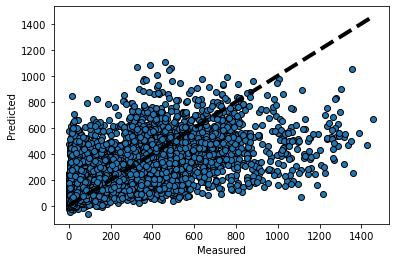

In [37]:
fig,ax = plt.subplots()
ax.scatter(y_train, predicted, edgecolors = (0,0,0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [38]:
scoring = ['r2','neg_mean_squared_error','neg_mean_absolute_error']
for i in scoring:
    scores = cross_val_score(gbr, X_train, y_train, cv=15, scoring = i)
#    print(scores)
    if i == 'r2':
        print(i, ': ', scores.mean())
    elif i == 'neg_mean_squared_error':    
        x = -1*scores.mean()
        y = math.sqrt(x) 
        print('RMSE: ', "%0.3f" % y)
    elif i == 'neg_mean_absolute_error':
        x = -1*scores.mean()
        print(i, ": %0.2f (+/- %0.2f)" % (x, scores.std() * 2))   

r2 :  0.36474598912547357
RMSE:  198.333
neg_mean_absolute_error : 132.01 (+/- 16.23)
